### **Detecção e Redução de Fraudes no Setor Financeiro**

# Bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Bibliotecas para classificação
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import auc, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from collections import Counter
from collections import Counter
from sklearn import metrics
from imblearn.under_sampling import ClusterCentroids
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
data_fraude = pd.read_csv('fraud_detection_dataset.csv')

In [3]:
fraude = data_fraude[:]
#fraude = data_fraude.tail(1000000) #Selecionando apenas 100000 

In [4]:
fraude

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# EDA

In [5]:
# Verificando os tipos de dados do dataset 
fraude.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Verificando valores ausentes. #Não há valores ausentes
fraude.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Verificando dados que foram classificados como fraude
fraude[fraude['isFraud'] ==1][:20]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1,0


As fraudes acontecem em TRANSFER e CASH_OUT

In [8]:
# Verificando dados que foram classificados como fraude por transferência >200.000 
fraude[:][fraude['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Dos 16 registros de fraude com valor >200.000, TODOS possuem as variáveis oldbalanceDest e newbalanceDest com 0.

As variáveis oldbalanceOrg e newbalanceOrg também possuem exatamente o mesmo valor, não é descontado o valor em dinheiro na transação.

In [9]:
fraude.describe() # A diferença de intervalos nos valores numéricos implica necessidade de normalização

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
# Verificar a distribuição da variável type, para ver quando a fraude ocorre com mais frequência

print(fraude['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


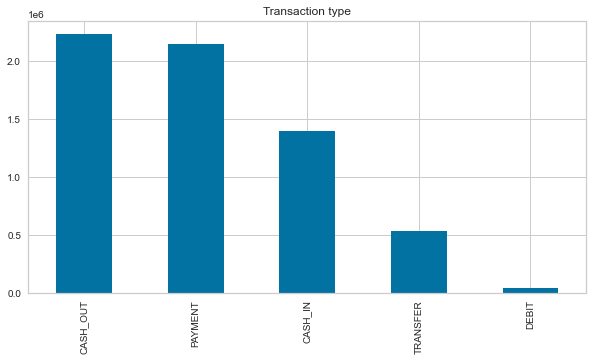

In [11]:
# Verificar a distribuição da variável type, para ver quando a fraude ocorre com mais frequência
print(fraude.type.value_counts())

f, ax = plt.subplots(figsize=(10, 5))
fraude.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(10,5))
plt.show()

In [12]:
fraude_isFraud = fraude[(fraude['isFraud'] == 1)]
fraude_isFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


0    6354407
1       8213
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

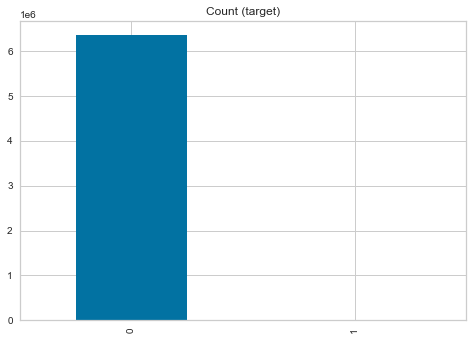

In [13]:
print(fraude['isFraud'].value_counts()) # De 6354407 dados, 8213 são fraude
fraude['isFraud'].value_counts().plot(kind='bar', title='Count (target)')

[Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')]

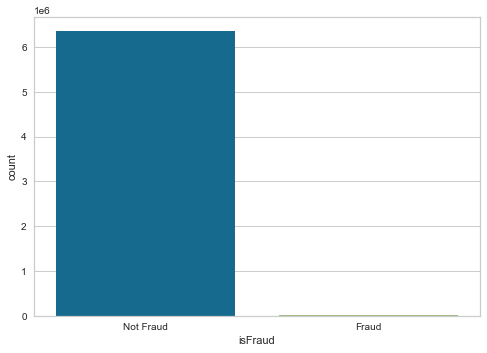

In [14]:
g = sns.countplot('isFraud', data=fraude)
g.set_xticklabels(['Not Fraud', 'Fraud'])

In [15]:
# Quais tipos de transações são mais comuns ao cometer fraudes?
print(fraude[(fraude['isFraud'] == 1)]['type'].value_counts())

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


<AxesSubplot:xlabel='isFraud', ylabel='amount'>

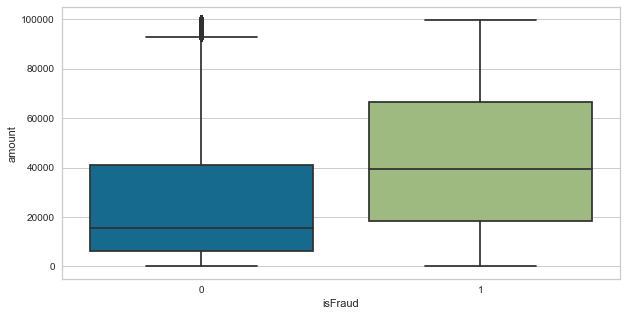

In [16]:
# Distribuicao de isFraud com amount
plt.figure(figsize=(10,5))
sns.boxplot(x = 'isFraud', y = 'amount', data = fraude[fraude.amount < 1e5]) #Fraude mais comum com valores mais altos

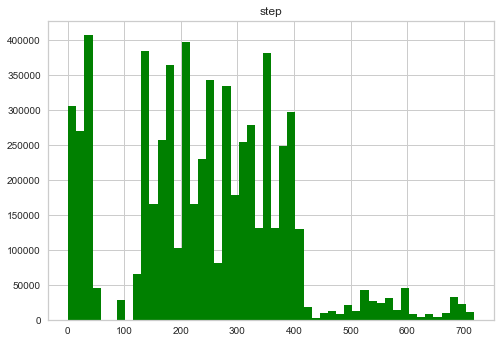

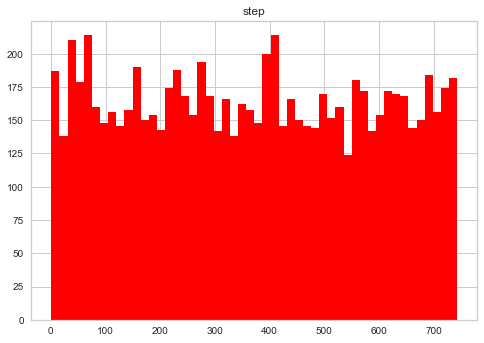

<Figure size 288x144 with 0 Axes>

In [17]:
# Variável step é o momento da simulação (30 dias), em que a transação é realizada
bins = 50

fraude[(fraude['isFraud'] == 0)].hist(column="step",color="green",bins=bins)

fraude[(fraude['isFraud'] == 1)].hist(column ="step",color="red",bins=bins)

plt.figure(figsize=(4,2))
plt.show()

Após a etapa 400 as transações reais diminuem consideravelmente, enquanto as fraudulentas permanecem constantes.

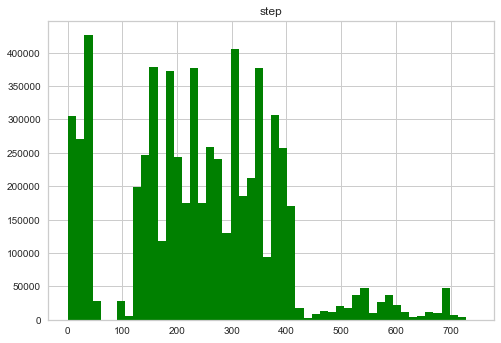

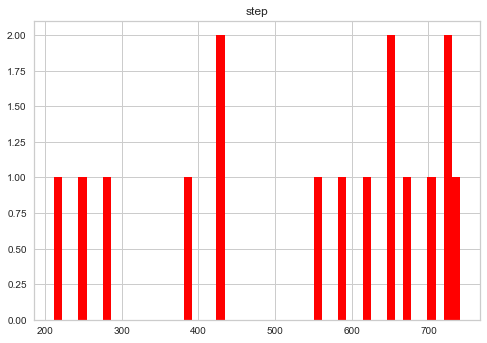

<Figure size 288x144 with 0 Axes>

In [18]:
bins = 50

fraude[(fraude['isFlaggedFraud'] == 0)].hist(column="step",color="green",bins=bins)

fraude[(fraude['isFlaggedFraud'] == 1)].hist(column ="step",color="red",bins=bins)

plt.figure(figsize=(4,2))
plt.show()

In [19]:
# Criando variáveis dummy e eliminando as categóricas
# Eliminando as contas de destino e origem porque não foram consideradas variáveis importantes
dataset = pd.concat([fraude.drop(columns=['isFraud','isFlaggedFraud']),pd.get_dummies(fraude.type)] ,axis=1)
dataset = dataset.drop(['type', 'nameOrig', 'nameDest'],1)
dataset = pd.concat([dataset,fraude.iloc[:,-2:]],axis=1)
pd.DataFrame.head(dataset)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,0,0


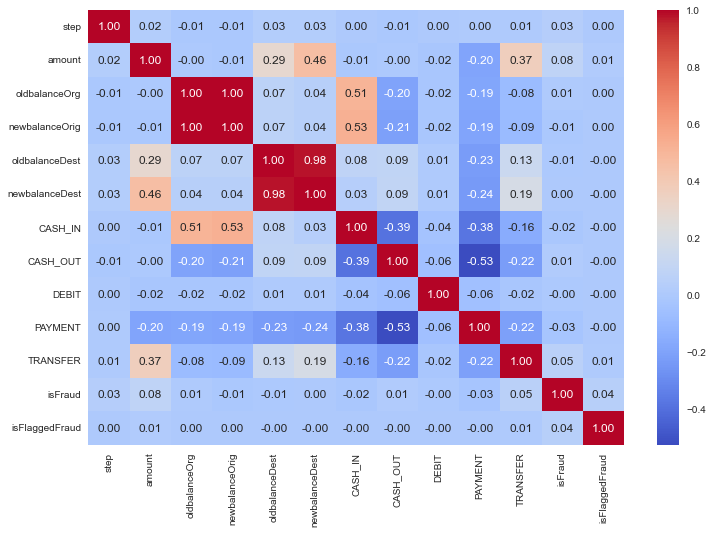

In [20]:
# Verificar a matriz de correlação entre as features
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    dataset.corr(), 
    annot=True,    
    fmt='.2f',    
    cmap='coolwarm',   
)

plt.show()

In [21]:
# Matriz de correlação
quantitativas = dataset.iloc[:,:6]

In [22]:
quantitativas.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [23]:
corr_mat = quantitativas.corr(method="pearson")
corr_mat.style.background_gradient(cmap='coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000


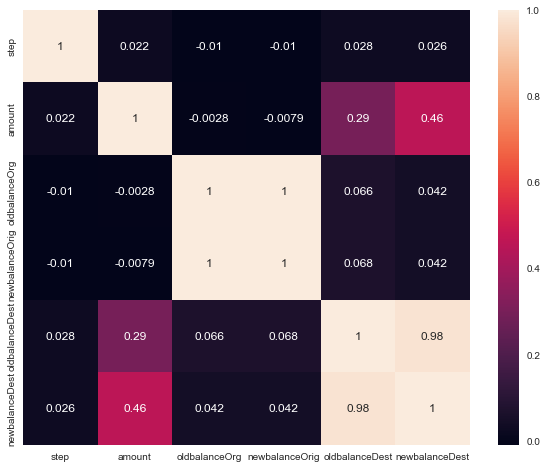

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.show()

Correlação entre as seguintes variáveis: oldbalanceDest e newbalanceDest / oldbalanceOrg e newbalanceOrig. Isso porque quando o dinheiro é enviado a um destinatário, este aumenta seu capital, enquanto a origem diminui.

In [25]:
total = dataset['isFraud'].value_counts()[0] + fraude['isFraud'].value_counts()[1]
fraud = (fraude['isFraud'].value_counts()[1]/total) * 100
print('Porcentagem de fraude:', fraud)

Porcentagem de fraude: 0.12908204481801522


# Divisão do Dataset

In [26]:
#Separar dados em treino e teste
X = dataset.drop(columns = ['isFraud', 'isFlaggedFraud'])
y = dataset['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
#Tamanho do dataset de treino
len(X_train)

4453834

In [28]:
#Tamanho do dataset de teste
len(X_test)

1908786

In [29]:
#Verificando percentual das classes nos datasets
print('Não fraude', round(
        y_train.value_counts()[0]/len(y_train)*100, 2), '% do dataset de treino')
print('Fraude', round(
        y_train.value_counts()[1]/len(y_train)*100, 2), '% do dataset de treino')

Não fraude 99.87 % do dataset de treino
Fraude 0.13 % do dataset de treino


In [30]:
print('Não fraude', round(
        y_test.value_counts()[0]/len(y_test)*100, 2), '% do dataset de teste')
print('Fraud', round(
        y_test.value_counts()[1]/len(y_test)*100, 2), '% do dataset de teste')

Não fraude 99.87 % do dataset de teste
Fraud 0.13 % do dataset de teste


In [31]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4310249,308,260485.23,32371.00,292856.23,4633560.35,4373075.12,1,0,0,0,0
318938,16,1387060.19,432673.78,0.00,0.00,1033440.62,0,0,0,0,1
3375139,254,1140661.98,59947.00,0.00,15000.85,1155662.83,0,0,0,0,1
5492781,380,169390.39,80047.10,249437.49,1467039.66,1297649.27,1,0,0,0,0
807263,40,4867.26,5989226.14,5994093.40,1609385.28,1604518.02,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1422253,139,175520.68,977.00,0.00,91159.52,266680.20,0,0,0,0,1
5834821,402,347110.99,103785.00,0.00,87871.75,434982.74,0,1,0,0,0
4182953,304,13259.63,0.00,0.00,0.00,0.00,0,0,0,1,0
3985280,298,24122.92,0.00,0.00,0.00,0.00,0,0,0,1,0


# Normalizacão dos dados

Como visto com a função describe(), há uma grande diferença na escala das variáveis numéricas. Vamos alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Com isso, ao usarmos amount, por exemplo, ele influenciará resultado pela sua característica mas não devido aos valores maiores.

In [32]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Balanceamento das Classes**

Testaremos algumas formas de balanceamento dos dados, pois temos muitas informações a respeito de transações que não são fraudes, e muito pouca informação a respeito da categoria fraude, que é a que nos interessa. 

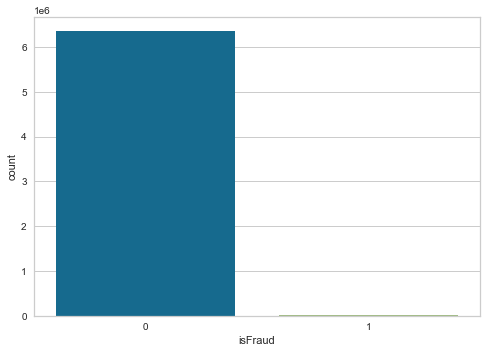

In [33]:
# Visualização da variável de interesse
g = sns.countplot(y)
plt.show()

In [34]:
len(X_train)

4453834

In [35]:
len(X_test)

1908786

## Baseline - Regressão Logística

In [36]:
logreg_baseline = LogisticRegression(max_iter=200)
logreg_baseline.fit(X_train, y_train)

y_pred_baseline = logreg_baseline.predict(X_test)

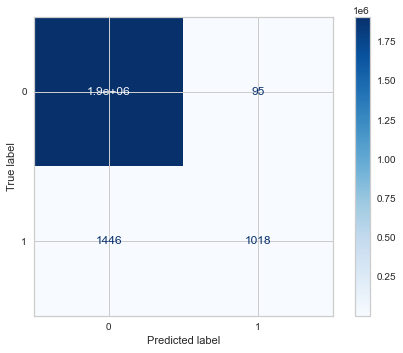

In [37]:
cm = confusion_matrix(y_test, y_pred_baseline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_baseline.classes_)
disp.plot(cmap='Blues')

In [38]:
print(classification_report(y_test, y_pred_baseline, target_names=['Fraud', 'Not Fraud']))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00   1906322
   Not Fraud       0.91      0.41      0.57      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.71      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



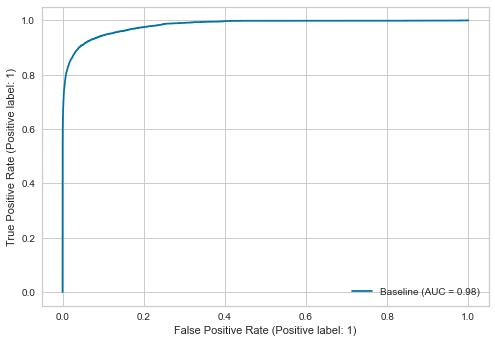

In [39]:
metrics.plot_roc_curve(logreg_baseline, X_train, y_train, name='Baseline')
plt.show()

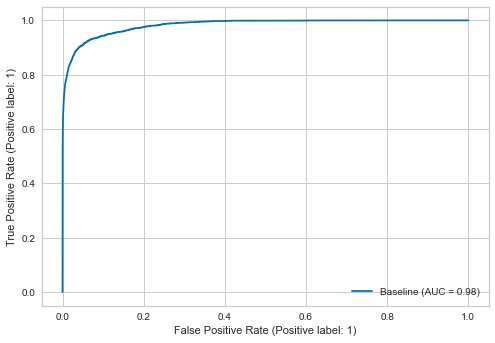

In [40]:
metrics.plot_roc_curve(logreg_baseline, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Classes Weights ('balanced')

In [41]:
logreg_balanced = LogisticRegression(class_weight='balanced')
logreg_balanced.fit(X_train, y_train)
y_pred = logreg_balanced.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[1809524,   96798],
       [    120,    2344]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred, target_names=['Fraud', 'Not Fraud']))

              precision    recall  f1-score   support

       Fraud       1.00      0.95      0.97   1906322
   Not Fraud       0.02      0.95      0.05      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



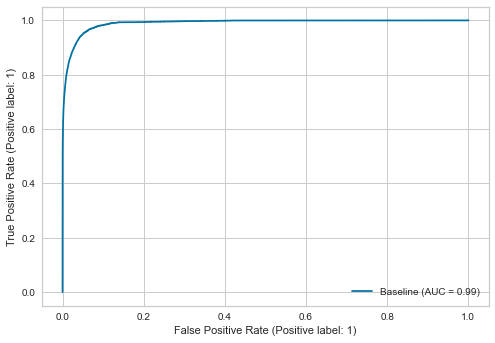

In [44]:
metrics.plot_roc_curve(logreg_balanced, X_train, y_train, name='Baseline')
plt.show()

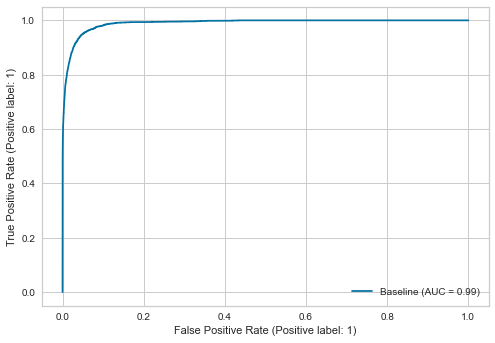

In [45]:
metrics.plot_roc_curve(logreg_balanced, X_test, y_test, name='Baseline')
plt.show()

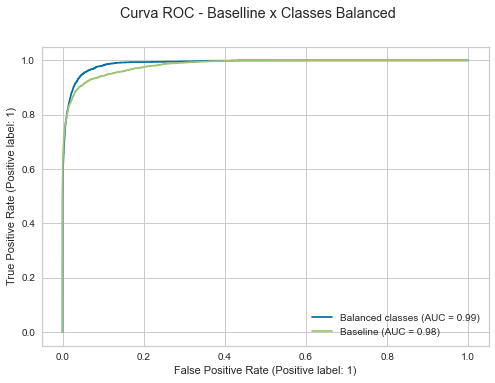

In [46]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg_balanced, X_test, y_test, 
                                              name='Balanced classes')
logreg_baseline_disp = metrics.plot_roc_curve(logreg_baseline, X_test, y_test,
                                              name='Baseline', 
                                              ax=logreg_balanced_disp.ax_)
logreg_baseline_disp.figure_.suptitle("Curva ROC - Baselline x Classes Balanced")

plt.show()

## Balanceamento dos Dados com Over-Sampling (ADASYN)

In [47]:
ada = ADASYN(random_state=42, sampling_strategy=0.22, n_jobs=-1)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_ada))

Resultado após o oversampling Counter({0: 4448085, 1: 978791})


In [48]:
len(X_ada[y_ada == 0])

4448085

In [49]:
len(X_ada[y_ada == 1])

978791

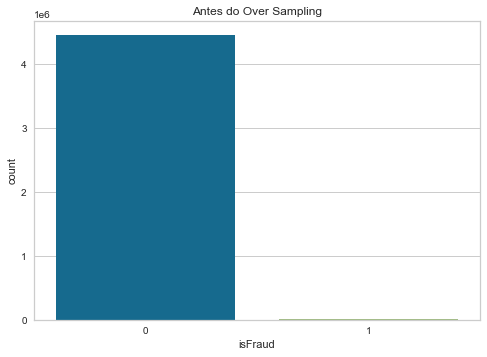

In [50]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

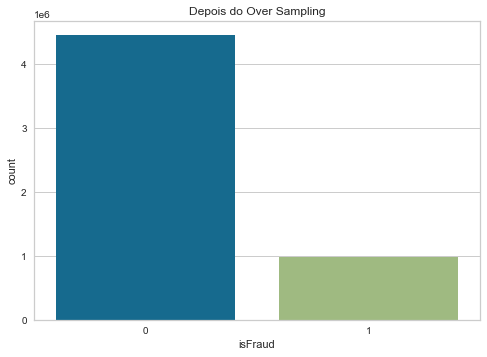

In [51]:
g = sns.countplot(y_ada)
plt.title("Depois do Over Sampling")
plt.show()

In [52]:
logreg2 = LogisticRegression(n_jobs=-1)
logreg2.fit(X_ada, y_ada)
y_pred2 = logreg2.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred2)

array([[1865126,   41196],
       [     96,    2368]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906322
           1       0.05      0.96      0.10      2464

    accuracy                           0.98   1908786
   macro avg       0.53      0.97      0.55   1908786
weighted avg       1.00      0.98      0.99   1908786



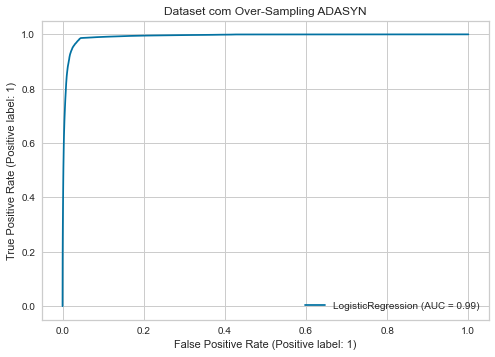

In [55]:
metrics.plot_roc_curve(logreg2, X_ada, y_ada)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

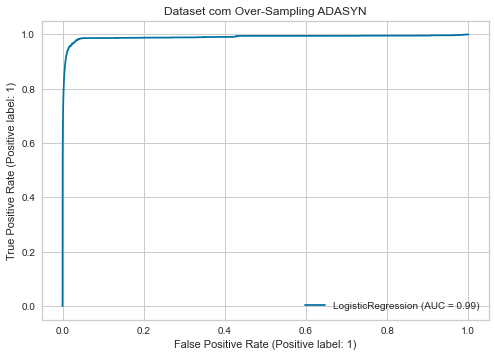

In [56]:
metrics.plot_roc_curve(logreg2, X_test, y_test)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

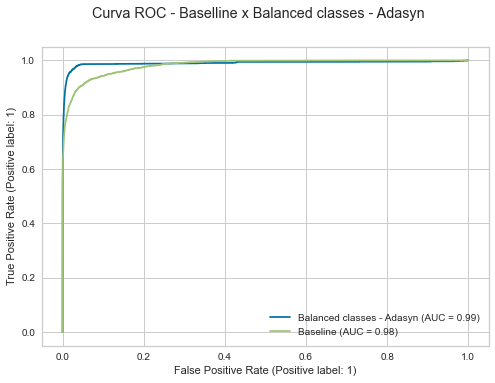

In [57]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg2, X_test, y_test, 
                                              name='Balanced classes - Adasyn')
logreg_baseline_disp = metrics.plot_roc_curve(logreg_baseline, X_test, y_test,
                                              name='Baseline', 
                                              ax=logreg_balanced_disp.ax_)
logreg_baseline_disp.figure_.suptitle("Curva ROC - Baselline x Balanced classes - Adasyn")

plt.show()

## Balanceamento dos Dados com Over-Sampling (SMOTE)

In [58]:
smo = SMOTE(random_state=42, sampling_strategy=0.22, n_jobs=-1)
X_smo, y_smo = smo.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_smo))

Resultado após o oversampling Counter({0: 4448085, 1: 978578})


In [59]:
len(X_smo[y_smo == 0])

4448085

In [60]:
len(X_smo[y_smo == 1])

978578

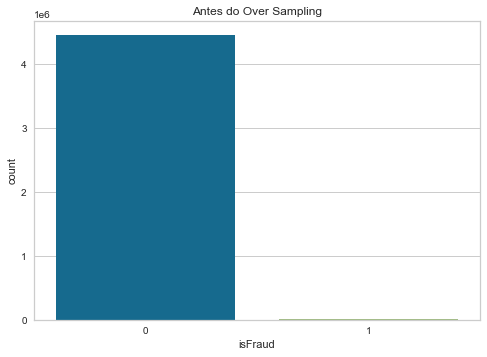

In [61]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

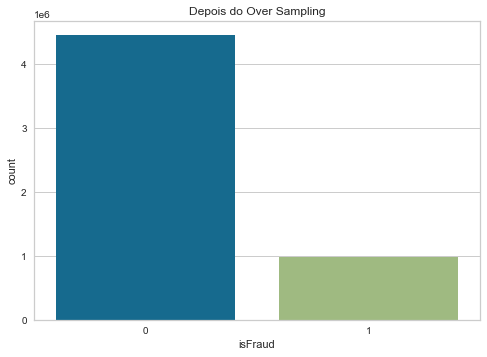

In [62]:
g = sns.countplot(y_smo)
plt.title("Depois do Over Sampling")
plt.show()

In [63]:
logreg3 = LogisticRegression(n_jobs=-1)
logreg3.fit(X_smo, y_smo)
y_pred3 = logreg3.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred3)

array([[1882650,   23672],
       [    340,    2124]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906322
           1       0.08      0.86      0.15      2464

    accuracy                           0.99   1908786
   macro avg       0.54      0.92      0.57   1908786
weighted avg       1.00      0.99      0.99   1908786



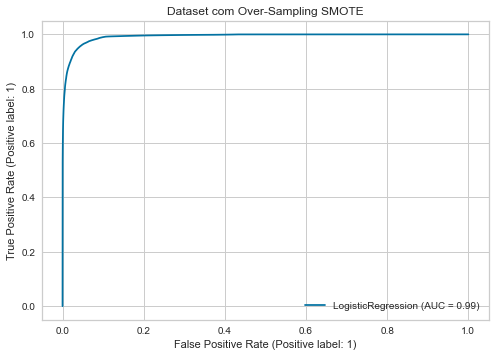

In [66]:
metrics.plot_roc_curve(logreg3, X_smo, y_smo)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

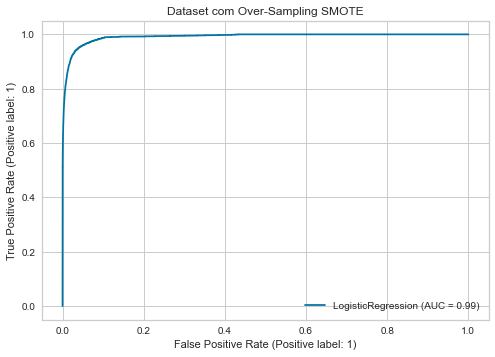

In [67]:
metrics.plot_roc_curve(logreg3, X_test, y_test)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

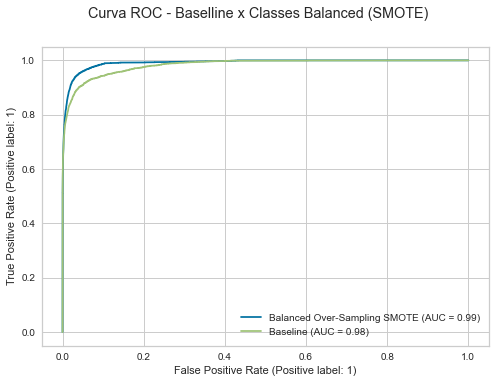

In [68]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg3, X_test, y_test, 
                                              name='Balanced Over-Sampling SMOTE')
logreg_baseline_disp = metrics.plot_roc_curve(logreg_baseline, X_test, y_test,
                                              name='Baseline', 
                                              ax=logreg_balanced_disp.ax_)
logreg_baseline_disp.figure_.suptitle("Curva ROC - Baselline x Classes Balanced (SMOTE)")

plt.show()

# Análise dos Resultados

Foi escolhido o balanceamento por SMOTE para aplicar o modelo de classificação.

In [71]:
#Construção do dataset para análises finais
y_df = pd.DataFrame(y_smo, columns=['isFraud'])

X_df = pd.DataFrame(X_smo, columns=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
                                    'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])

newdf = pd.concat([X_df, y_df], axis=1)
newdf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,0.453991,0.133805,-0.277631,-0.192460,1.042527,0.859216,1.883053,-0.736366,-0.080899,-0.714817,-0.302349,0
1,-1.597708,2.005310,-0.139123,-0.292551,-0.324812,-0.052308,-0.531053,-0.736366,-0.080899,-0.714817,3.307441,0
2,0.074567,1.595985,-0.268089,-0.292551,-0.320385,-0.018948,-0.531053,-0.736366,-0.080899,-0.714817,3.307441,0
3,0.959889,-0.017525,-0.261134,-0.207299,0.108104,0.019806,1.883053,-0.736366,-0.080899,-0.714817,-0.302349,0
4,-1.429075,-0.290836,1.783478,1.756078,0.150109,0.103563,1.883053,-0.736366,-0.080899,-0.714817,-0.302349,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5426658,3.231839,0.815875,-0.056638,-0.292551,0.126394,0.266118,-0.531053,1.358020,-0.080899,-0.714817,-0.302349,1
5426659,-0.679961,-0.134927,-0.254674,-0.292551,-0.324718,-0.307345,-0.531053,1.358020,-0.080899,-0.714817,-0.302349,1
5426660,1.065285,-0.102380,-0.247895,-0.292551,-0.324812,-0.334376,-0.531053,-0.736366,-0.080899,-0.714817,3.307441,1
5426661,0.240366,0.080012,-0.209906,-0.292551,-0.324812,-0.334376,-0.531053,-0.736366,-0.080899,-0.714817,3.307441,1


## Decision tree

### Decision Tree com dados desbalanceados

In [72]:
DT = tree.DecisionTreeClassifier()

DT.fit(X_train, y_train)

predictions = DT.predict(X_test)

In [73]:
print(DT.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, DT.predict(X_test)))

0.999677805683822
[[1906025     297]
 [    318    2146]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.88      0.87      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



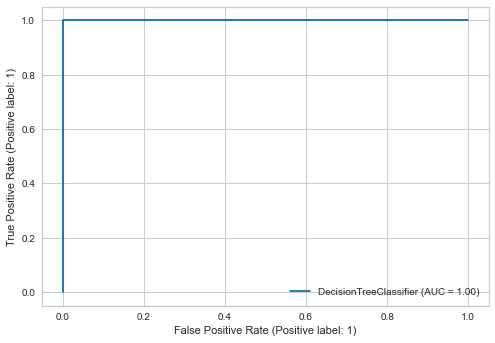

In [74]:
plot_roc_curve(DT, X_train, y_train)

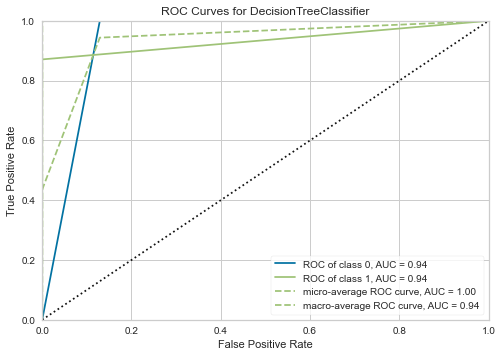

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier())

In [75]:
roc_auc(DT, X_train, y_train, X_test=X_test, y_test=y_test)

In [76]:
DT.score(X_train, y_train)

1.0

In [77]:
DT.score(X_test, y_test)

0.999677805683822

### Decision Tree com dados balanceados

In [78]:
DT2 = tree.DecisionTreeClassifier()

DT2.fit(X_df, y_df)

predictions2 = DT2.predict(X_test)

In [79]:
print(DT2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, DT2.predict(X_test)))

0.9994195263376827
[[1905277    1045]
 [     63    2401]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.70      0.97      0.81      2464

    accuracy                           1.00   1908786
   macro avg       0.85      0.99      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



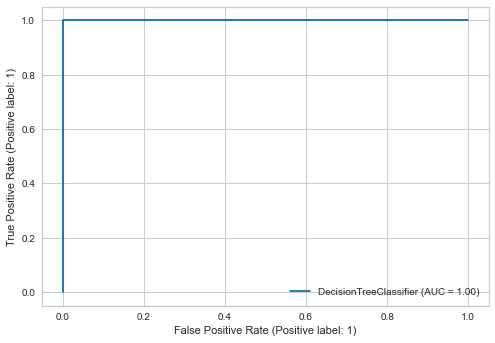

In [80]:
plot_roc_curve(DT2, X_df, y_df)

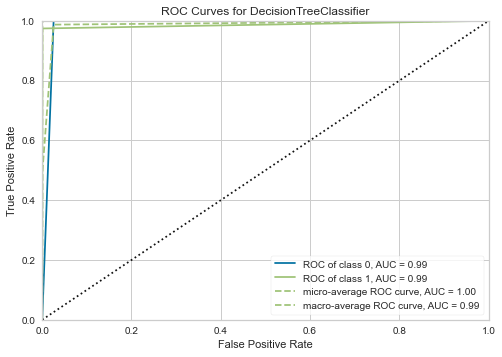

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier())

In [81]:
roc_auc(DT2, X_df, y_df, X_test=X_test, y_test=y_test)

In [82]:
DT2.score(X_df, y_df)

1.0

In [83]:
DT2.score(X_test, y_test)

0.9994195263376827

## Random Forest

### Random Forest com dados desbalanceados

In [84]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

predictions = RF.predict(X_test)

In [85]:
print(RF.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, RF.predict(X_test)))

0.9996940463729302
[[1906284      38]
 [    546    1918]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.98      0.78      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



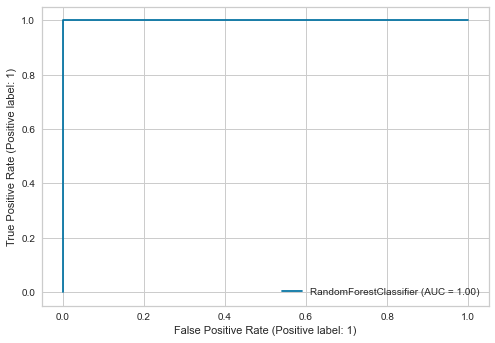

In [86]:
plot_roc_curve(RF, X_train, y_train)

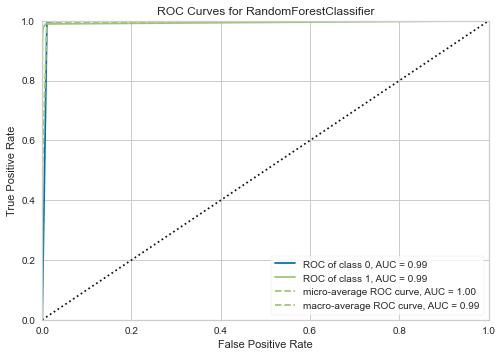

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier())

In [87]:
roc_auc(RF, X_train, y_train, X_test=X_test, y_test=y_test)

In [88]:
RF.score(X_train, y_train)

1.0

In [89]:
RF.score(X_test, y_test)

0.9996940463729302

### Random Forest com dados balanceados

In [90]:
RF2 = RandomForestClassifier()

RF2.fit(X_df, y_df)

predictions2 = RF2.predict(X_test)

In [91]:
print(RF2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, RF2.predict(X_test)))

0.9992937919703937
[[1905095    1227]
 [    121    2343]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.66      0.95      0.78      2464

    accuracy                           1.00   1908786
   macro avg       0.83      0.98      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786



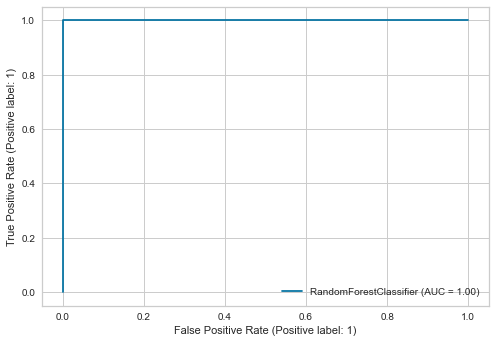

In [92]:
plot_roc_curve(RF2, X_train, y_train)

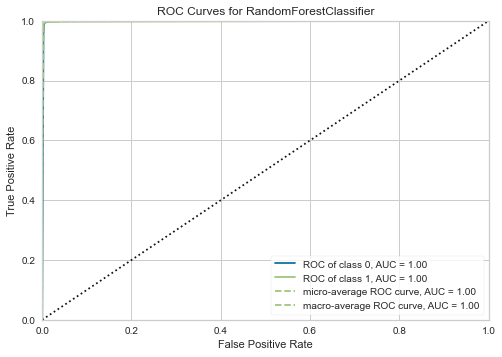

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier())

In [93]:
roc_auc(RF2, X_df, y_df, X_test=X_test, y_test=y_test)

In [94]:
RF2.score(X_df, y_df)

0.9999977886962945

In [95]:
RF2.score(X_test, y_test)

0.9992937919703937

## Regressão Logística

### Regressão Logística com dados desbalanceados

In [96]:
LR = LogisticRegression()

LR.fit(X_train, y_train)

predictions = LR.predict(X_test)

In [97]:
print(LR.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, LR.predict(X_test)))

0.9991916327969714
[[1906226      96]
 [   1447    1017]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.91      0.41      0.57      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.71      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



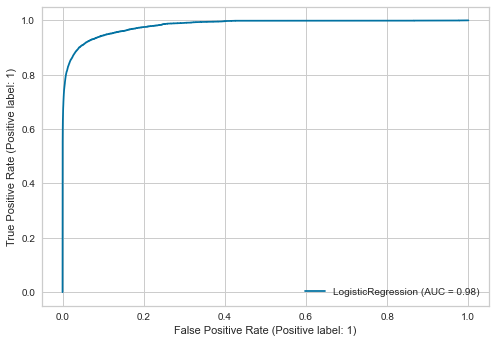

In [98]:
plot_roc_curve(LR, X_train, y_train)

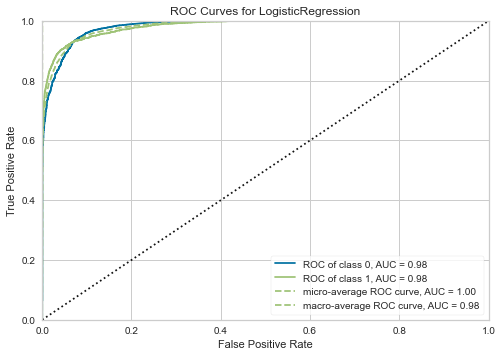

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression())

In [99]:
roc_auc(LR, X_train, y_train, X_test=X_test, y_test=y_test)

In [100]:
LR.score(X_train, y_train)

0.9992301015260111

In [101]:
LR.score(X_test, y_test)

0.9991916327969714

### Regressão Logística com dados balanceados

In [102]:
LR2 = LogisticRegression()

LR2.fit(X_df, y_df)

predictions2 = LR2.predict(X_test)

In [103]:
print(LR2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, LR2.predict(X_test)))

0.987422896018726
[[1882655   23667]
 [    340    2124]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906322
           1       0.08      0.86      0.15      2464

    accuracy                           0.99   1908786
   macro avg       0.54      0.92      0.57   1908786
weighted avg       1.00      0.99      0.99   1908786



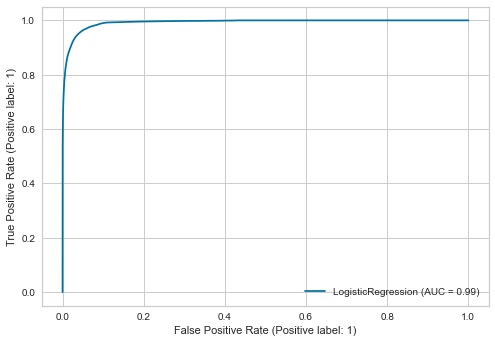

In [104]:
plot_roc_curve(LR2, X_df, y_df)

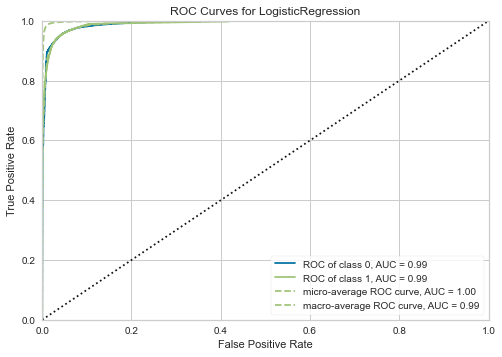

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression())

In [105]:
roc_auc(LR2, X_df, y_df, X_test=X_test, y_test=y_test)

In [106]:
LR2.score(X_df, y_df)

0.9660185274080959

In [107]:
LR2.score(X_test, y_test)

0.987422896018726

## XGBoosting

### XGB com dados desbalanceados

In [108]:
XG = XGBClassifier()

XG.fit(X_train, y_train)

predictions = XG.predict(X_test)

In [109]:
print(XG.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, XG.predict(X_test)))

0.9997909666143822
[[1906261      61]
 [    338    2126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.86      0.91      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.93      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786



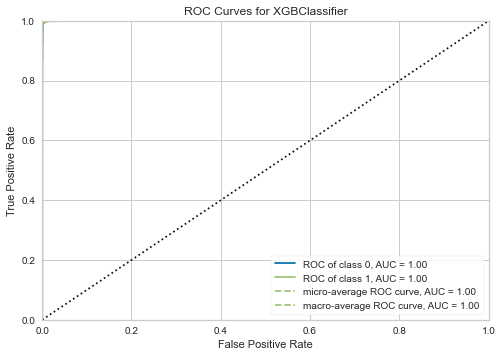

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [110]:
roc_auc(XG, X_train, y_train, X_test=X_test, y_test=y_test)

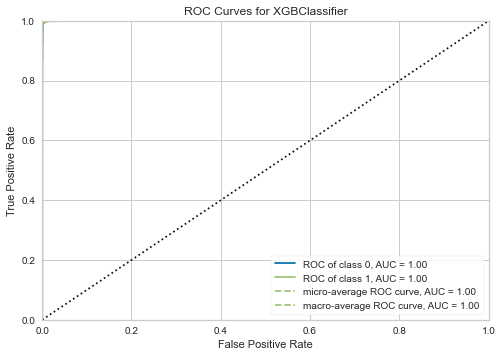

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [111]:
roc_auc(XG, X_train, y_train, X_test=X_test, y_test=y_test)

In [112]:
XG.score(X_train, y_train)

0.999886614543784

In [113]:
XG.score(X_test, y_test)

0.9997909666143822

### XGB com dados balanceados

In [114]:
XG2 = XGBClassifier()

XG2.fit(X_df, y_df)

predictions2 = XG2.predict(X_test)

In [115]:
print(XG2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, XG2.predict(X_test)))

0.9988222880930602
[[1904104    2218]
 [     30    2434]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.52      0.99      0.68      2464

    accuracy                           1.00   1908786
   macro avg       0.76      0.99      0.84   1908786
weighted avg       1.00      1.00      1.00   1908786



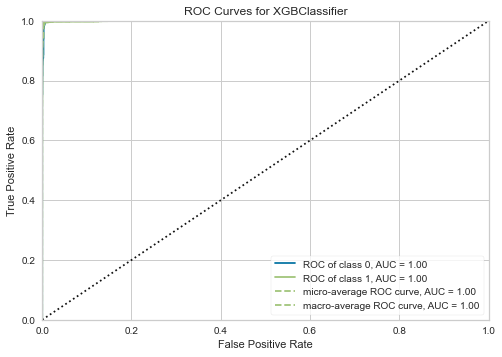

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [116]:
roc_auc(XG2, X_df, y_df, X_test=X_test, y_test=y_test)

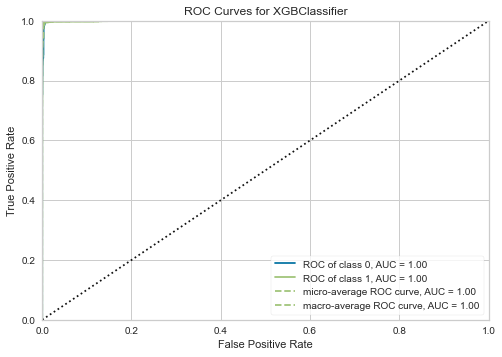

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [117]:
roc_auc(XG2, X_df, y_df, X_test=X_test, y_test=y_test)

In [118]:
XG2.score(X_df, y_df)

0.998769593763239

In [119]:
XG2.score(X_test, y_test)

0.9988222880930602

# Comparando os modelos

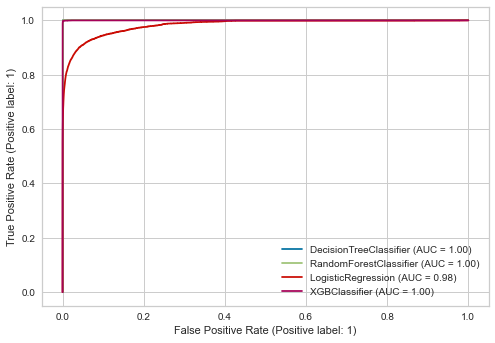

In [120]:
#Dados desbalanceados
classifiers = [DT, RF, LR, XG]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_train, y_train, ax=ax)

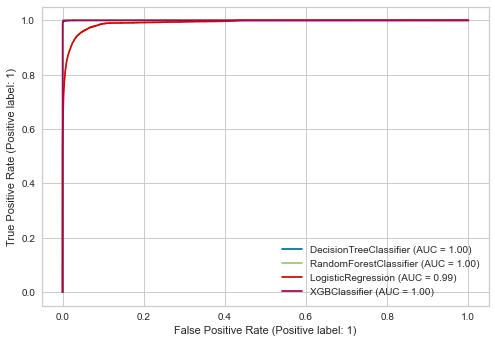

In [121]:
#Dados balanceados
classifiers = [DT2, RF2, LR2, XG2]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_train, y_train, ax=ax)

Com o classificador XGBoosting com dados desbalanceados, 87% das fraudes foram detectadas corretamente.